# Introduction to Python #2: Python's Data Model

## Disclaimer!

- I recommend you train in Jupyter Notebooks (like this presentation). But when you want to share your work, publish it, or if you're working in a company, notebooks are not usually the way to go.
    - Get familiar to the terminal and to writing in `.py` files (just like you do with C++ `.cpp` files or Javascript `.js` files).

- Also, get familiar with Linux. It's much easier to develop and write code on Linux, much easier to use the terminal, you just have to start.

First-year student? Second-year student? Last-year student? Your life will be better with linux and I promise it's easy. Also, it's something employers ask for!

In [1]:
def superscript(n):
    return "".join(["⁰¹²³⁴⁵⁶⁷⁸⁹"[ord(c) - ord("0")] for c in str(n)])

In [2]:
import numpy as np

In [3]:
arr = np.array([1, 2, 3])
print(arr)

[1 2 3]


In [4]:
lst = [1,2,3]
lst.append(19)
print(lst)

[1, 2, 3, 19]


- So, what is `np`? It's a **module**; we explained that in the previous talk!

- What's `array` in `np.array(...)`? It's a **class** (can loosly be called a **type**).
    - A **class** is a **_template_** that represents a **type** which consists of **properties** and their **functionality**

- What's `arr`? It's an **object**
    - An **object** is an instance of that class. For example, **human** is a **class**, **Saad** is an instance of that or a human **object**.

You can get the type/class of an object/instance by passing it to the `type(...)` function!

You can use `isinstance` to check if an object is of a certain type!

Let's check the type/class for built-in types:

In [5]:
type(1)

int

In [6]:
type("hello")

str

In [7]:
type(1.5)

float

In [8]:
isinstance(1, int)

True

In [9]:
isinstance(1.5, int)

False

In [10]:
isinstance(1.5, float)

True

In [11]:
isinstance("1", str)

True

In [12]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

print(arr1 + arr2)

[5 7 9]


In [13]:
len(arr1)

3

In [14]:
arr[0]

1

So, how do you create your own type/class?

In [15]:
class MyType:
    pass

How do we create objects of it?

In [16]:
x = MyType()

In [17]:
print(x)

In [18]:
type(x)

__main__.MyType

What happens when you we execute `MyType()`?

It looks for a method called `__init__` under `MyType`

In this case we don't have one; let's create it!

## Build a Polynomial Class
We want to represent a polynomial like **_ax<sup>2</sup>+bx+c_** or **_ax<sup>3</sup>+bx<sup>2</sup>+cx+d_**

In [19]:
class Polynomial:
    def __init__(self, coefs):
        self.coefs = coefs

In [20]:
x = Polynomial()

TypeError: __init__() missing 1 required positional argument: 'coefs'

In [21]:
x = Polynomial([5, 2, 3])  # 3.x² + 2x + 5

In [22]:
print(x.coefs)

[5, 2, 3]


In [23]:
print(x)

In [24]:
class Polynomial:
    def __init__(self, coefs):
        self.coefs = coefs

    def __str__(self):
        s = ""
        degree = len(self.coefs)
        for index, c in enumerate(self.coefs):
            if c != 0:
                term_degree = superscript(index)
                is_positive = c > 0
                term = f"{c}x{term_degree}"

                if is_positive:
                    s = "+" + term + s
                else:
                    s = term + s
        return s

In [25]:
x = Polynomial([5, 2, 3])

In [26]:
print(x)

+3x²+2x¹+5x⁰


In [27]:
y = Polynomial([2, 3, 1])

In [28]:
print(y)

+1x²+3x¹+2x⁰


What is the degree of `x` or `y`?

In [29]:
len([1,2,3])

3

Can we assume the same logic for a polynomial?

In [30]:
len(x)

TypeError: object of type 'Polynomial' has no len()

In [31]:
class Polynomial:
    def __init__(self, coefs):
        self.coefs = coefs

    def __str__(self):
        s = ""
        degree = len(self.coefs)
        for index, c in enumerate(self.coefs):
            if c != 0:
                term_degree = superscript(index)
                is_positive = c > 0
                term = f"{c}x{term_degree}"

                if is_positive:
                    s = "+" + term + s
                else:
                    s = term + s
        return s
    
    def __len__(self):
        return len(self.coefs)

In [32]:
x = Polynomial([5, 2, 3])
print(len(x))

3


In [33]:
fn1 = Polynomial([5, 2, 3])
fn2 = Polynomial([2, 3, 1])

In [34]:
fn3 = fn1 + fn2

TypeError: unsupported operand type(s) for +: 'Polynomial' and 'Polynomial'

In [35]:
class Polynomial:
    def __init__(self, coefs):
        self.coefs = coefs

    def __str__(self):
        s = ""
        degree = len(self.coefs)
        for index, c in enumerate(self.coefs):
            if c != 0:
                term_degree = superscript(index)
                is_positive = c > 0
                term = f"{c}x{term_degree}"

                if is_positive:
                    s = "+" + term + s
                else:
                    s = term + s
        return s

    def __len__(self):
        return len(self.coefs)

    def __add__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] + other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(other.coefs[i])

        return Polynomial(new_coefs)

In [36]:
fn1 = Polynomial([5, 2, 3])
fn2 = Polynomial([2, 3, 1])
fn3 = fn1 + fn2

In [37]:
print(" ", fn1)
print("+", fn2)
print("--------------")
print("=", fn3)

  +3x²+2x¹+5x⁰
+ +1x²+3x¹+2x⁰
--------------
= +4x²+5x¹+7x⁰


In [38]:
fn3 = fn1 - fn2

TypeError: unsupported operand type(s) for -: 'Polynomial' and 'Polynomial'

In [39]:
class Polynomial:
    def __init__(self, coefs):
        self.coefs = coefs

    def __str__(self):
        s = ""
        degree = len(self.coefs)
        for index, c in enumerate(self.coefs):
            if c != 0:
                term_degree = superscript(index)
                is_positive = c > 0
                term = f"{c}x{term_degree}"

                if is_positive:
                    s = "+" + term + s
                else:
                    s = term + s
        return s

    def __len__(self):
        return len(self.coefs)

    def __add__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] + other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(other.coefs[i])

        return Polynomial(new_coefs)

    def __sub__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] - other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(-other.coefs[i])

        return Polynomial(new_coefs)

In [40]:
fn1 = Polynomial([5, 2, 3])
fn2 = Polynomial([2, 3, 1])

In [41]:
fn4 = fn1 - fn2

In [42]:
print(" ", fn1)
print("-", fn2)
print("--------------")
print("=", fn4)

  +3x²+2x¹+5x⁰
- +1x²+3x¹+2x⁰
--------------
= +2x²-1x¹+3x⁰


OK, can we calculate `f(3)` or `f(-2.5)`?

In [43]:
fn1(3)

TypeError: 'Polynomial' object is not callable

In [54]:
class Polynomial:
    def __init__(self, coefs):
        self.coefs = coefs

    def __str__(self):
        s = ""
        degree = len(self.coefs)
        for index, c in enumerate(self.coefs):
            if c != 0:
                term_degree = superscript(index)
                is_positive = c > 0
                term = f"{c}x{term_degree}"

                if is_positive:
                    s = "+" + term + s
                else:
                    s = term + s
        return s

    def __len__(self):
        return len(self.coefs)

    def __add__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] + other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(other.coefs[i])

        return Polynomial(new_coefs)

    def __sub__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] - other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(-other.coefs[i])

        return Polynomial(new_coefs)

    def __call__(self, x):
        answer = 0
        for idx, coef in enumerate(self.coefs):
            answer += coef * (x ** idx)
        return answer

In [58]:
fn1 = Polynomial([5, 2, 3])

In [59]:
print(fn1)

+3x²+2x¹+5x⁰


In [60]:
fn1(3)

38

In [61]:
import matplotlib.pyplot as plt

In [62]:
class Polynomial:
    def __init__(self, coefs):
        self.coefs = coefs

    def __str__(self):
        s = ""
        degree = len(self.coefs)
        for index, c in enumerate(self.coefs):
            if c != 0:
                term_degree = superscript(index)
                is_positive = c > 0
                term = f"{c}x{term_degree}"

                if is_positive:
                    s = "+" + term + s
                else:
                    s = term + s
        return s

    def __len__(self):
        return len(self.coefs)

    def __add__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] + other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(other.coefs[i])

        return Polynomial(new_coefs)

    def __sub__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] - other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(-other.coefs[i])

        return Polynomial(new_coefs)

    def __call__(self, x):
        answer = 0
        for idx, coef in enumerate(self.coefs):
            answer += coef * (x ** idx)
        return answer

    def plot(self):
        x = range(-100, 100)
        y = []
        for i in x:
            y.append(self(i))

        plt.plot(x, y)

In [63]:
fn1 = Polynomial([5, 2, 3])

In [64]:
print(fn1)

+3x²+2x¹+5x⁰


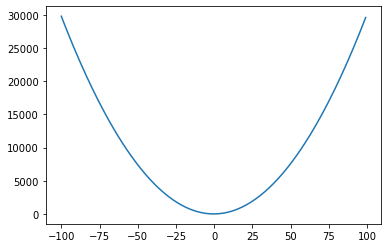

In [65]:
fn1.plot()

In [74]:
class Polynomial:
    def __init__(self, coefs):
        self.coefs = coefs

    def __str__(self):
        s = ""
        degree = len(self.coefs)
        for index, c in enumerate(self.coefs):
            if c != 0:
                term_degree = superscript(index)
                is_positive = c > 0
                term = f"{c}x{term_degree}"

                if is_positive:
                    s = "+" + term + s
                else:
                    s = term + s
        return s

    def __len__(self):
        return len(self.coefs)

    def __add__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] + other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(other.coefs[i])

        return Polynomial(new_coefs)

    def __sub__(self, other):
        new_coefs = []
        minimum = min(len(self), len(other))
        maximum = max(len(self), len(other))

        for i in range(minimum):
            new_coefs.append(self.coefs[i] - other.coefs[i])

        for i in range(minimum, maximum):
            if len(self) == maximum:
                new_coefs.append(self.coefs[i])
            else:
                new_coefs.append(-other.coefs[i])

        return Polynomial(new_coefs)

    def __call__(self, x):
        answer = 0
        for idx, coef in enumerate(self.coefs):
            answer += coef * (x ** idx)
        return answer

    def plot(self):
        x = range(-100, 100)
        y = []
        for i in x:
            y.append(self(i))

        plt.plot(x, y)

    def derivative(self):
        new_coefs = self.coefs[1:]
        for i in range(len(new_coefs)):
            new_coefs[i] = new_coefs[i] * (i+1)
        
        return Polynomial(new_coefs)

In [75]:
fn1 = Polynomial([5, 2, 3])
print(fn1)

+3x²+2x¹+5x⁰


In [76]:
fn1_prime = fn1.derivative()
print(fn1_prime)

+6x¹+2x⁰


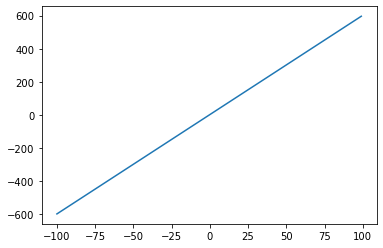

In [78]:
fn1_prime.plot()

## What other methods you can use?
- For comparison (e.g. `>`, '<', '==', ...) you can implement `__lt__`, `__gt__`, `__eq__`; more [here](https://docs.python.org/3/reference/datamodel.html#object.__lt__)
- If you want to use `fn[1]` to get the first coeffieceint instead of `fn.coefs[1]`, you can implement `__getitem__`; more [here](https://docs.python.org/3/reference/datamodel.html#object.__getitem__)
- All methods can be found here: https://docs.python.org/3/reference/datamodel.htm